# Análisis Exploratorio de datos. Ejemplo 2

## PROYECTO - ANÁLISIS DESCRIPTIVO

#### Descripción de la data: Empresa de ventas online

Clientes de diferentes países

Periodo de transacciones - 1 Dic 2010 - 9 Dic 2011 (Un año)

In [ ]:
# instalando una librería usando pip o conda
!pip install missingno
!conda install missingno

Defaulting to user installation because normal site-packages is not writeable


importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [ ]:
from google.colab import drive
drive.mount('\gdrive')

df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/Data_Analisis_Descriptivo.csv", sep=",", encoding='latin-1')
print(df.head(6))
print(df.tail(6))

In [ ]:
pwd


In [ ]:
df = pd.read_csv("Data1/Data_Analisis_Descriptivo.csv", sep=",", encoding='latin-1')
print(df.head(6))
print(df.tail(6))

En algunos casos no hemos visto nuestro data set por lo que es adecuado tener una vista de él ya sea de las primeras observaciones, las ultimas o algunas aleatoriamente:

In [ ]:
df.head()

In [ ]:
del df['Dia_Facturacion'] # Para eliminar variables no importantes 

In [ ]:
del df['Mes_Facturacion'] 

In [ ]:
del df['Precio_Final'] 

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.sample(10)

Cambiamos el nombre de las columnas

In [ ]:
df.rename(index=str, columns={'N_Transaccion ':'n_transaccion',
                              'Codigo_Producto': 'codigo_producto',
                              'Descripcion': 'descripcion',
                              'Cantidad':'cantidad',
                              'Fecha_Hora':'fecha_hora',
                              'Precio_Unitario':'precio_unitario',
                              'ID_Cliente':'id_cliente',
                              'Pais':'pais'}, inplace=True)

### df.head(5)

## Limpieza y tratamiento de datos

La limpieza de datos, data cleansing o scrubbing es un proceso necesario para asegurar la calidad de los datos que se emplearán para analytics. Este paso es fundamental para minimizar el riesgo que supondría el basar la toma de decisiones en información poco precisa, errónea o incompleta.

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
# Revisamos valores perdidos para cada variable
df.isnull().sum().sort_values(ascending=False)

In [ ]:
# Revisamos como se están mostrando los valores perdidos en nuestra data
# df[df.isnull().any(axis=1)].head()

In [ ]:
# Cambiamos el formato de la columna fecha hora a un formato de fecha en python 
df['fecha_hora'] = pd.to_datetime(df.fecha_hora, format='%d/%m/%Y %H:%M')

In [ ]:
df

In [ ]:
df.info()

Removemos filas con valores perdidos 

In [ ]:
# Creamos una nueva tabla sin los valores perdidos
df_new = df.dropna() #es peligroso

In [ ]:
# Revisamos nuevamente los valores perdidos en nuestra tabla 
df_new.isnull().sum().sort_values(ascending=False)

In [ ]:
df_new.info()

In [ ]:
# Cambiamos el tipo de variable del id_cliente
df_new['id_cliente'] = df_new['id_cliente'].astype('str')

In [ ]:
df_new.info()

In [ ]:
df_new.head()

In [ ]:
#Veo la cantidad de filas y columnas que tiene mi nueva tabla
df_new.shape

Para iniciar hagamos un análisis descriptivo sencillo de los datos:

In [ ]:
df_new.describe()

In [ ]:
# Descriptivos de datos categóricos
df_new.describe(include = 'O')

In [ ]:
df_new.describe(include = 'all')

In [ ]:
# resumen de datos categoricos
df_new.groupby('N_Transaccion').size().sort_values(ascending=False)

In [ ]:
df_new.head()

veamos que la variable cantidad cuenta con valores negativos lo cual no está bien, así que los removemos de nuestra data

In [ ]:
df_new = df_new[df_new.cantidad > 0]

In [ ]:
df_new.describe()

In [ ]:
df_new.info()

In [ ]:
#Reviso nuevamente el decriptivo y verifico que ya no tenga negativos
df_new.describe().round(2)

Muchas veces podemos crear nuevas variables a partir de las que ya tenemos:

In [ ]:
df_new['venta_total'] = df_new['cantidad'] * df_new['precio_unitario']
df_new.head()

Creamos nuevas columnas

In [ ]:
df_new.head()

In [ ]:
del df_new['mes'] 

In [ ]:
del df_new['ano_mes']

In [ ]:
df_new.insert(loc=2, column='ano_mes', value=df_new['fecha_hora'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='mes', value=df_new.fecha_hora.dt.month)
# +1 para hacer Lunes=1.....hasta Domingo=7
df_new.insert(loc=4, column='dia', value=(df_new.fecha_hora.dt.dayofweek)+1)
df_new.insert(loc=5, column='hora', value=df_new.fecha_hora.dt.hour)
df_new.head()

In [ ]:
# Cambiamos el tipo de variable de las que se han creado
df_new['ano_mes'] = df_new['ano_mes'].astype('str')
df_new['mes'] = df_new['mes'].astype('str')
df_new['dia'] = df_new['dia'].astype('str')
df_new['hora'] = df_new['hora'].astype('str')

In [ ]:
df_new.info()

In [ ]:
df_new

### Análisis Exploratorio

Como parte inicial de todo proyecto de Business Analytics el análisis exploratorio contituye el primer paso en el desarrollo de la solución. Como veremos en las próximas sesiones, a pesar de la gran complejidad de las herramientas de modelación que usaremos, no hay remplazo al entedimiento detallado de la información desde el punto de vista de negocio.

#### Variables cuantitativas

In [ ]:
df_new.describe().round(2)

En ocasiones cuando queremos mayor detalle de la información podemos ajustar los percentiles a nuestro gusto:

In [ ]:
df_new.describe(percentiles=[.01,.1,.25,.5,.75,.9,0.99]).T

¿Qué oportunidades veo? Hay grupos de clientes con compras muy por encima del promedio (Véase el percentil 99 de las ventas totales) ¿Podríamos hacer promociones personalizadas? R: Para encontrar valores outliers en los datos

Otra forma de calcular los indicadores estadisticos

In [ ]:
#Media
df_new['venta_total'].mean()

In [ ]:
#Desviación estándar 
df_new['venta_total'].std()

### Histogramas 

Otro punto importante al empezar la exploración de un nuevo conjunto de datos es conociendo la distribución de los datos. Por ejemplo, si queremos conocer los histogramas de todas las variables cuantitativas de nuestra data lo hacemos de la siguiente manera:

In [ ]:
df_new.hist(figsize=(10,10))

Si bien la distribución me indica que hay alta concentración de datos en los rangos inferiores de las variables, veamos la oportunidad, hay un porcentaje pequeño de clientes que tienen compras muy por encima del promedio, eso a futuro me daría la oportunidad de segmentarlos y poder armarles paquetes promocionales en el objetivo de fidelizarlos.<br>

En esta oportunidad con miras a lograr una mejor lectura de los datos omitiremos los valores por encima del percentil 99 de la venta total.

In [ ]:
df_new = df_new[df_new.venta_total < 220.36]

In [ ]:
df_new.hist(figsize=(10,10))

Si quiero ver el histograma de una sola variable:

In [ ]:
plt.hist(df_new["venta_total"])
plt.show()

Aquí observamos la salida por defecto para nuestra visualización. Notamos algunas aspectos de mejora como: el tamaño de la gráfica, el número de bins, o la impresión de los arreglos de datos al tope de la figura. Para corregir esto y personalizar nuestra figura podemos:
 
1. Definir una figura de marco para la visualización
2. Ajustar el tamaño de la figura
3. Cambiar el color del histograma
4. Ajustar el número de bins
5. Crear una cuadricula para visualizar mejor los valores de referencia
6. Finalizar con la instruccion show para que se muestre toda la visualización y no los arreglos de datos del histograma

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.hist(df_new["venta_total"],bins=50,color='brown')
#plt.grid()
plt.show()

Para seguir con la personalización, ahora podemos incluir legendas a nuestros ejes:

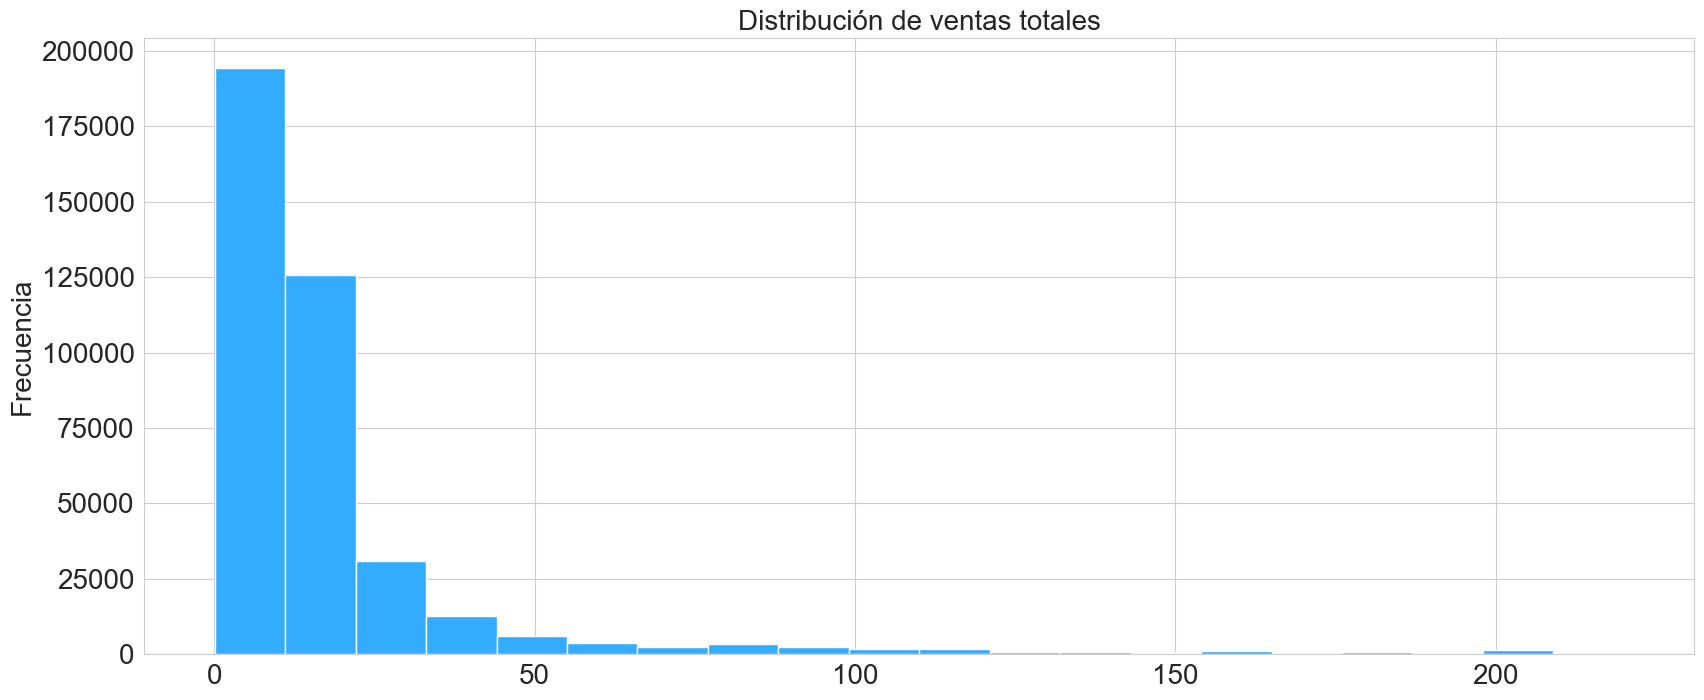

In [47]:
fig = plt.figure(figsize=(20,8))
plt.hist(df_new["venta_total"],bins=20,color='#33ACFF')

plt.title('Distribución de ventas totales', fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.grid()
plt.show()

#### Diagrama de cajas

Recordemos que el diagrama de boxplot nos permite representar gráficamente los cuartiles de una distribución y adicionalmente posibles outliers de en la data.

<Axes: ylabel='venta_total'>

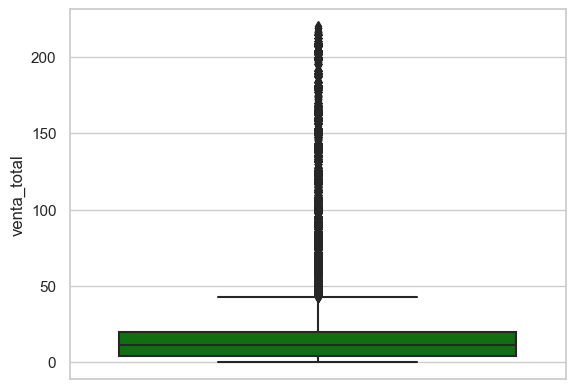

In [48]:
sns.set(style="whitegrid")
sns.boxplot(y=df_new["venta_total"],color='green')

<Axes: ylabel='venta_total'>

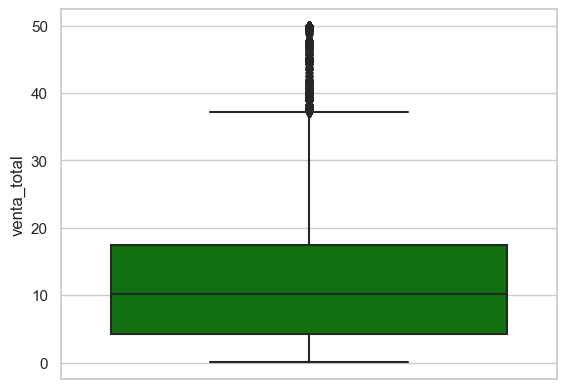

In [49]:
df_new2 = df_new[df_new.venta_total < 50]#creo una variable temporal sólo para ayudar a la visualización 
sns.set(style="whitegrid")
sns.boxplot(y=df_new2["venta_total"],color='green')

### Diagrama de violines

A continuación veremos el diagrama de violines, que funciona de forma similar al anterior pero nos da mas informacion de la distribución y no solo algunos valores de referencia. Veamos los mismos ejemplos, pero en esta nueva funcionalidad:

<Axes: ylabel='venta_total'>

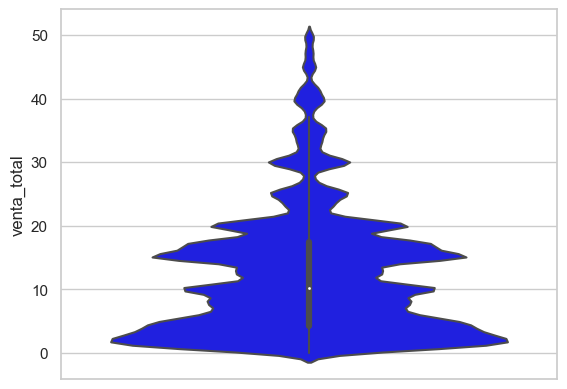

In [50]:
sns.violinplot(y=df_new2["venta_total"],color='blue')

### Diagrama de enjambre - swarmplot (es pesado)

Por último, tenemos el diagrama de enjambre como una forma alternativa de representar la distribución. Aquí nos enfocamos en visualizar cada observación como un punto de información. Nuevamente, veamos los mismos ejemplos, pero en esta nueva funcionalidad:

In [53]:
sns.swarmplot(y=df_new2["venta_total"],color='red')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CE9FEABB50> (for post_execute):


KeyboardInterrupt: 

### Variables cualitativas

Observo la frecuencia de las variables cualitativas

In [54]:
df_new['pais'].value_counts()

UNITED KINGDOM          350227
GERMANY                   8589
FRANCE                    7986
EIRE                      6918
SPAIN                     2411
BELGIUM                   1904
NETHERLANDS               1889
SWITZERLAND               1783
PORTUGAL                  1422
NORWAY                    1033
AUSTRALIA                 1021
ITALY                      740
CHANNEL ISLANDS            735
FINLAND                    636
CYPRUS                     567
SWEDEN                     382
DENMARK                    365
AUSTRIA                    355
POLAND                     322
JAPAN                      281
ISRAEL                     244
UNSPECIFIED                244
SINGAPORE                  212
ICELAND                    181
USA                        179
CANADA                     149
GREECE                     141
MALTA                      109
UNITED ARAB EMIRATES        67
EUROPEAN COMMUNITY          57
RSA                         57
LEBANON                     45
LITHUANI

Si quiero ver la variable como porcentaje

In [55]:
df_new['pais'].value_counts(normalize=True)*100

UNITED KINGDOM          89.487899
GERMANY                  2.194610
FRANCE                   2.040535
EIRE                     1.767646
SPAIN                    0.616044
BELGIUM                  0.486499
NETHERLANDS              0.482666
SWITZERLAND              0.455581
PORTUGAL                 0.363341
NORWAY                   0.263946
AUSTRALIA                0.260880
ITALY                    0.189080
CHANNEL ISLANDS          0.187803
FINLAND                  0.162507
CYPRUS                   0.144876
SWEDEN                   0.097606
DENMARK                  0.093263
AUSTRIA                  0.090707
POLAND                   0.082276
JAPAN                    0.071799
ISRAEL                   0.062345
UNSPECIFIED              0.062345
SINGAPORE                0.054169
ICELAND                  0.046248
USA                      0.045737
CANADA                   0.038072
GREECE                   0.036027
MALTA                    0.027851
UNITED ARAB EMIRATES     0.017119
EUROPEAN COMMU

### Diagrama de barras

Un gráfico de barras es una forma de resumir un conjunto de datos por categorías. La altura de cada barra es proporcional a una agregación específica (por ejemplo, la suma de los valores de la categoría que representa).

<Axes: >

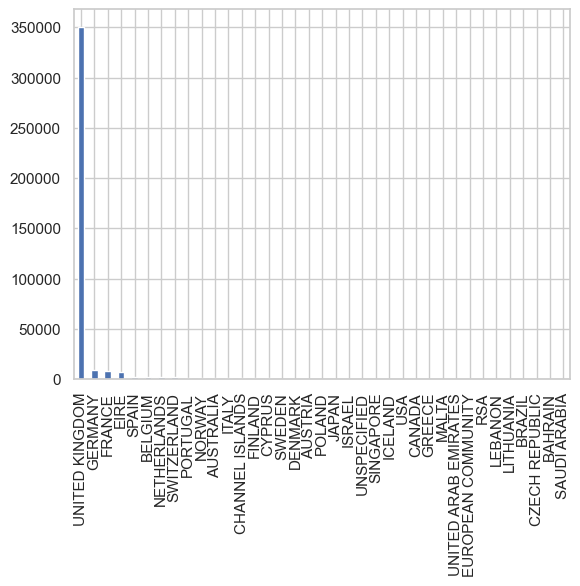

In [60]:
df_new['pais'].value_counts().plot(kind='bar')

<Axes: >

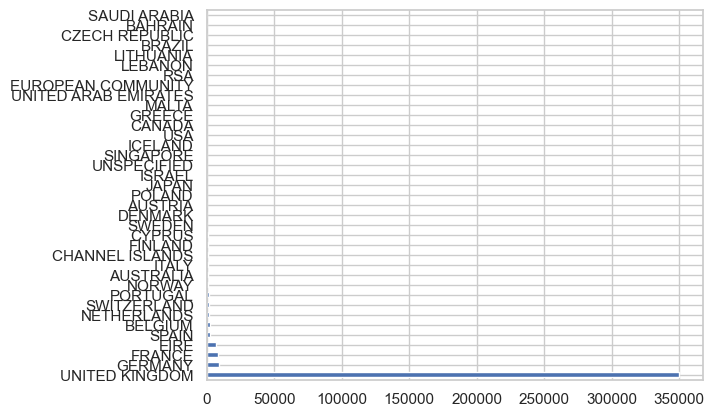

In [59]:
df_new['pais'].value_counts().plot(kind='barh')

### Diagrama de torta 

En el diagrama de torta se divide un circulo en tantas porciones como clases o grupos de datos existan, de modo que a cada clase le corresponde un arco de círculo proporcional a su número de apariciones o frecuencia.

<Axes: ylabel='pais'>

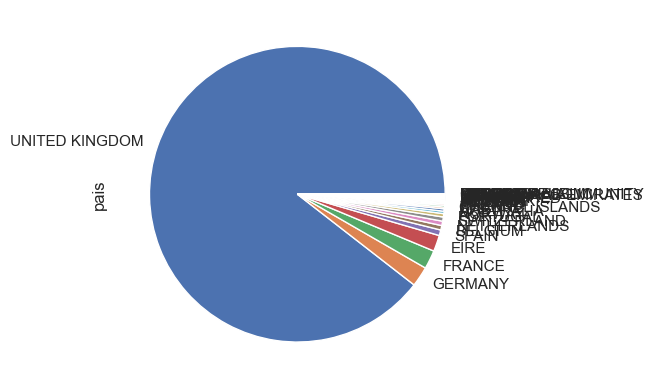

In [62]:
df_new['pais'].value_counts().plot.pie()

Dada la dispersión que tienen mis datos por país, ¿Me conviene usar un gráfico de torta?

## Respondiendo hipótesis del negocio

#### Análisis bivariados y multivariados

¿Qué preguntas quiero responder con esta data? ¿Qué ``insights`` puedo ir sacando?

#### 1.¿Cuántas compras tenemos por cliente?

Creamos una nueva tabla agrupada por cliente y el número de transacciones que ha realizado

In [70]:
df_new.groupby(by=['id_cliente','pais'], as_index=False)['N_Transaccion'].count()

,id_cliente,pais,N_Transaccion
0,12347.0,ICELAND,181
1,12348.0,FINLAND,27
2,12349.0,ITALY,71
3,12350.0,NORWAY,16
4,12352.0,NORWAY,77
...,...,...,...
4281,18280.0,UNITED KINGDOM,10
4282,18281.0,UNITED KINGDOM,7
4283,18282.0,UNITED KINGDOM,12
4284,18283.0,UNITED KINGDOM,754


Revisamos el top 10 de clientes con mayor número de compras

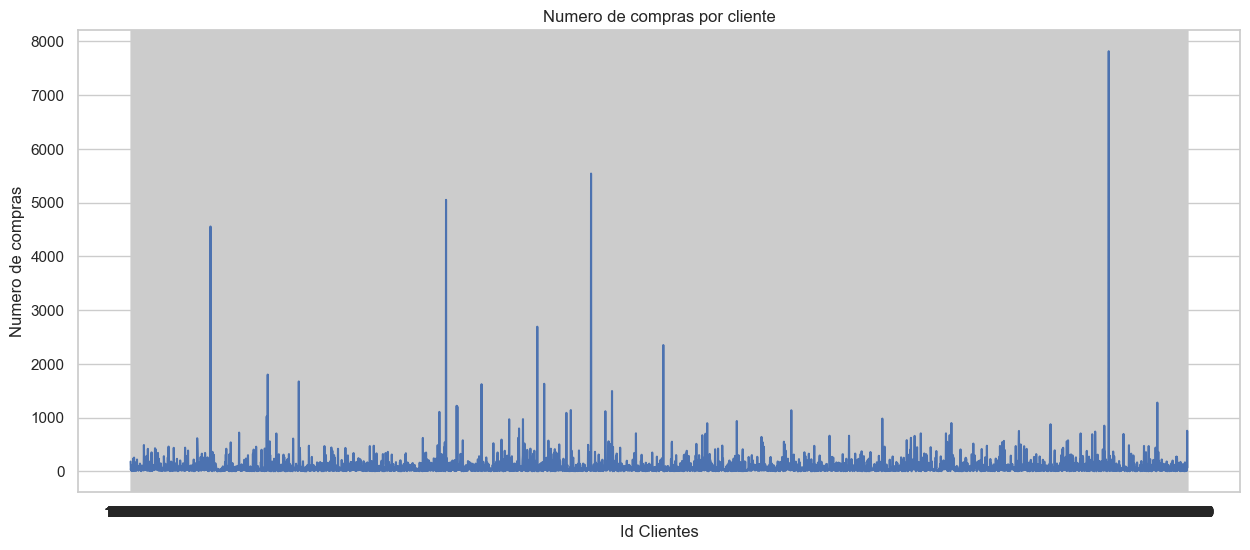

In [65]:
orders = df_new.groupby(by=['id_cliente','pais'], as_index=False)['N_Transaccion'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.id_cliente, orders.N_Transaccion)
plt.xlabel('Id Clientes')
plt.ylabel('Numero de compras')
plt.title('Numero de compras por cliente')
plt.show()

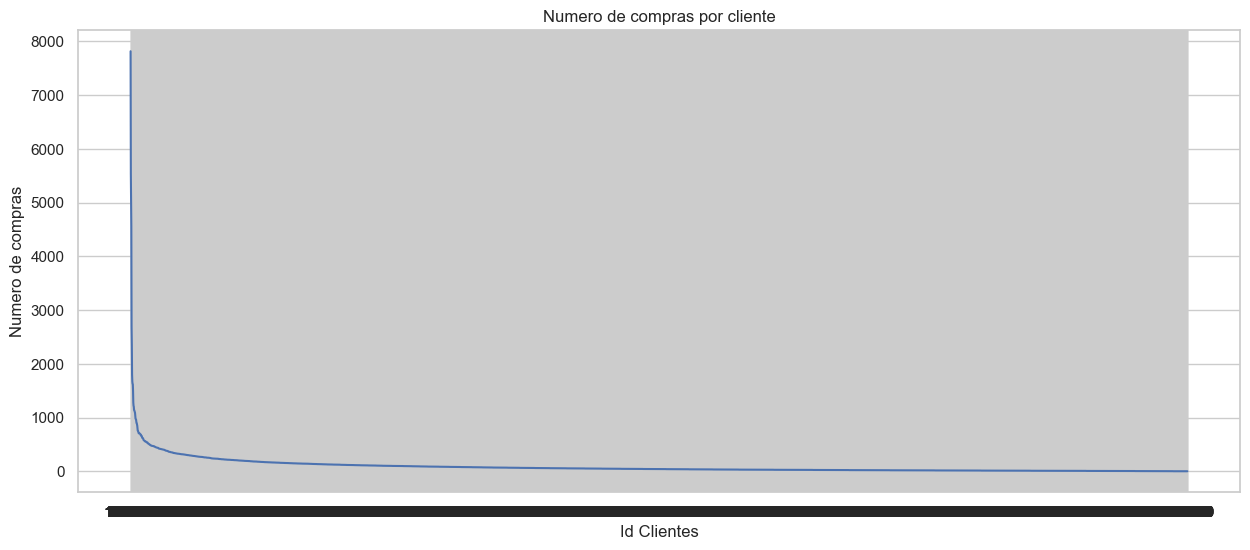

In [72]:
orders = df_new.groupby(by=['id_cliente','pais'], as_index=False)['N_Transaccion'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.id_cliente, orders.N_Transaccion.sort_values(ascending=False))
plt.xlabel('Id Clientes')
plt.ylabel('Numero de compras')
plt.title('Numero de compras por cliente')
plt.show()

In [73]:
print('Top 10 de clientes con mayor número de compras...')
orders.sort_values(by='N_Transaccion', ascending=False).head(10)

Top 10 de clientes con mayor número de compras...


,id_cliente,pais,N_Transaccion
3966,17841.0,UNITED KINGDOM,7818
1867,14911.0,EIRE,5541
1279,14096.0,UNITED KINGDOM,5052
324,12748.0,UNITED KINGDOM,4556
1649,14606.0,UNITED KINGDOM,2691
2160,15311.0,UNITED KINGDOM,2350
556,13089.0,UNITED KINGDOM,1800
682,13263.0,UNITED KINGDOM,1672
1677,14646.0,NETHERLANDS,1629
1423,14298.0,UNITED KINGDOM,1621


Más allá de la gráfica, el número de transacciones puede ser una variable relevante para pensar en un análisis de segmentación a futuro, ya que observamos diferente tipos de consumidores según número de transacciones/compras.

#### ¿Cuánto dinero gastan los clientes?

In [75]:
money_spent = df_new.groupby(by=['id_cliente','pais'], as_index=False)['venta_total'].sum()
print('Top 10 de clientes con mayor consumo en dólares')
money_spent.sort_values(by='venta_total', ascending=False).head(10)

Top 10 de clientes con mayor consumo en dólares


,id_cliente,pais,venta_total
1677,14646.0,NETHERLANDS,165741.77
1867,14911.0,EIRE,131586.08
3730,17511.0,UNITED KINGDOM,81821.03
1423,14298.0,UNITED KINGDOM,64598.36
2160,15311.0,UNITED KINGDOM,63659.74
556,13089.0,UNITED KINGDOM,56078.82
1322,14156.0,EIRE,54506.89
54,12415.0,AUSTRALIA,50407.53
986,13694.0,UNITED KINGDOM,49438.09
1274,14088.0,UNITED KINGDOM,44759.12


### Descubriendo patrones por país

In [77]:
# Ventas promedio por pais
dataframe = df_new.groupby(['pais','id_cliente'])['venta_total'].agg(["mean","var",'max'])
dataframe

mean          var     max
pais        id_cliente                                 
AUSTRALIA   12386.0      41.390000   521.467667   75.00
            12388.0      28.686600   333.058091   90.00
            12393.0      26.203125   451.682450  160.80
            12415.0     103.082883  3959.572595  214.20
            12422.0      18.598947    58.945480   49.89
...                            ...          ...     ...
UNSPECIFIED 16320.0      18.593929    68.949933   51.00
USA         12558.0      24.541818   484.575796   74.88
            12607.0      15.555545    35.651979   39.60
            12646.0      30.316667   357.060409   90.00
            12733.0      20.086818   485.707632   88.56

[4286 rows x 3 columns]

Veamos la distribución de cantidad de compras por país

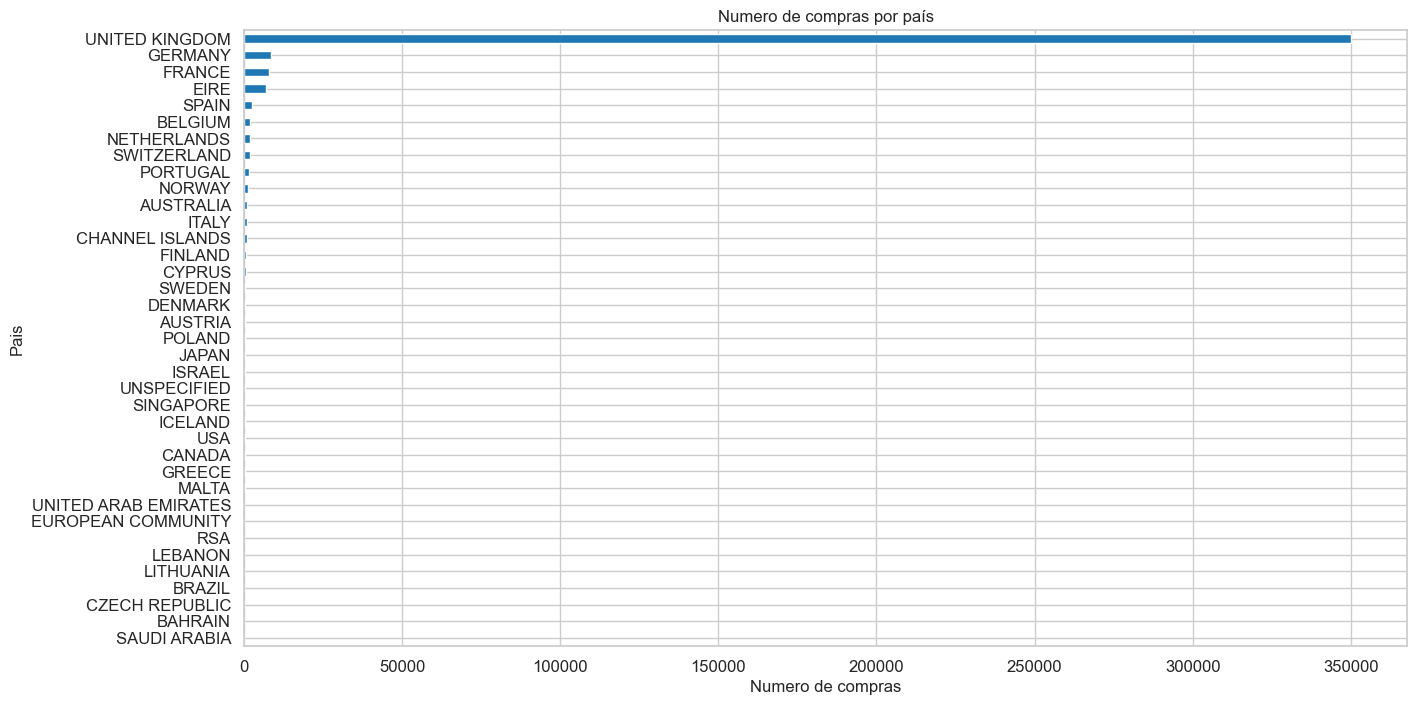

In [78]:
group_country_orders = df_new.groupby('pais')['N_Transaccion'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Numero de compras', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.title('Numero de compras por país', fontsize=12)
plt.show()

Ahora veamos la distribucion por cantidad de ventas totales

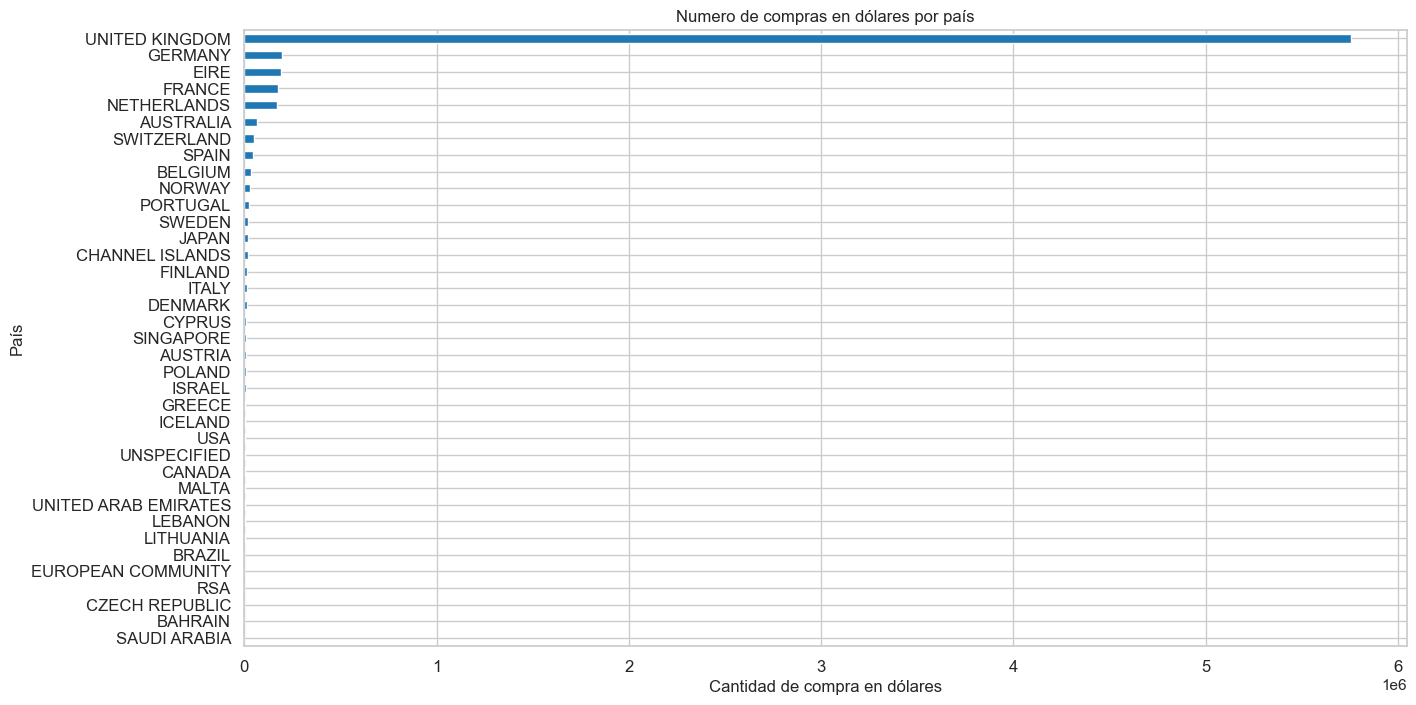

In [79]:
group_country_amount_spent = df_new.groupby('pais')['venta_total'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Cantidad de compra en dólares', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.title('Numero de compras en dólares por país', fontsize=12)
plt.show()

Observando ambas distribuciones, aparentemente el gasto total tiene una relación con el número de compras. ¿Lo verificamos?

In [80]:
correlacion = df_new.corr()
correlacion.head()

,cantidad,precio_unitario,venta_total
cantidad,1.000000,-0.206789,0.599664
precio_unitario,-0.206789,1.000000,0.194242
venta_total,0.599664,0.194242,1.000000


## Mapa de calor - heatmap

Los mapas de calor tienen gran número de aplicaciones en contexto de sistemas físicos, campo donde surgieron. Sin embargo en la actualidad y para nuestro proposito han encontrado una funcionalidad particular, analisis y representacion de correlaciones.

<Axes: >

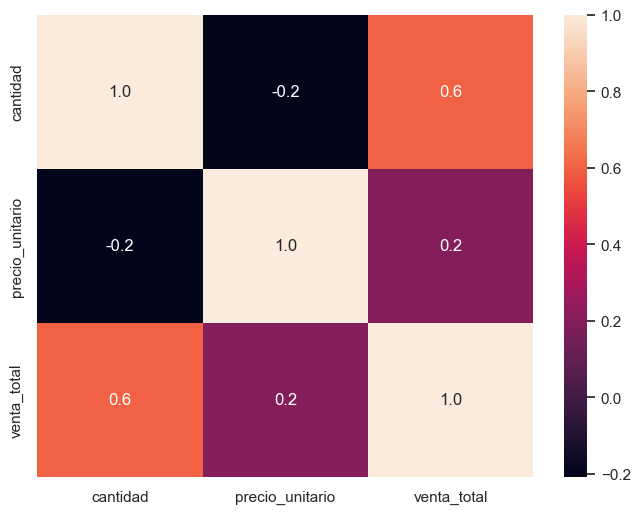

In [81]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(correlacion,annot=correlacion,fmt='.1f')

Si queremos verlo con otros tipos de diseños 

<Axes: >

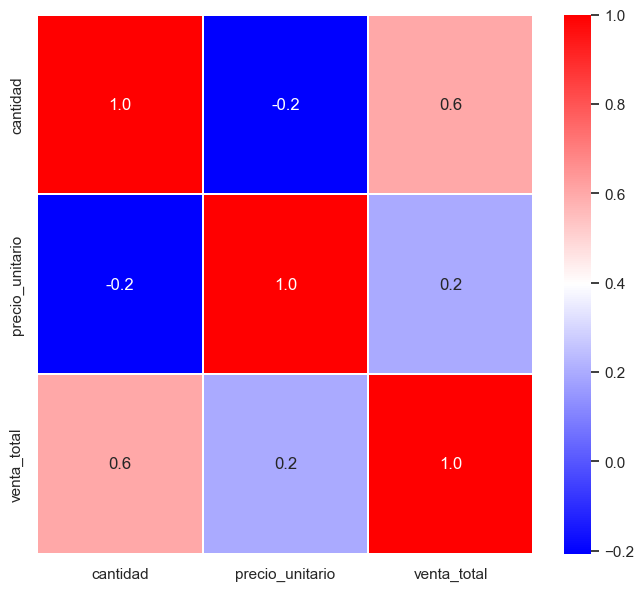

In [83]:
fig = plt.figure(figsize=(8,7))
sns.heatmap(correlacion,annot=correlacion,fmt='.1f',linewidth=0.2,cmap='bwr')

<Axes: >

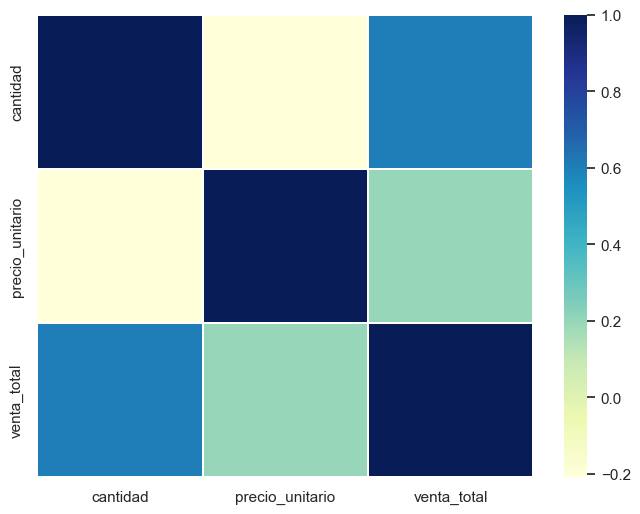

In [84]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(correlacion,linewidth=0.2,cmap='YlGnBu')

### Descubriendo patrones por fecha 

In [93]:
df_new

,N_Transaccion,codigo_producto,ano_mes,mes,dia,hora,descripcion,cantidad,fecha_hora,precio_unitario,id_cliente,pais,venta_total
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.95,17850.0,UNITED KINGDOM,17.70
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.75,17850.0,UNITED KINGDOM,22.50
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,4.15,17850.0,UNITED KINGDOM,33.20
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.75,17850.0,UNITED KINGDOM,22.50
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,4.25,17850.0,UNITED KINGDOM,25.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532815,581587,22613,201112,12,5,12,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,FRANCE,10.20
532816,581587,22899,201112,12,5,12,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,FRANCE,12.60
532817,581587,23254,201112,12,5,12,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,FRANCE,16.60
532818,581587,23255,201112,12,5,12,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,FRANCE,16.60


In [98]:
df_new['hora'].value_counts()

12    71125
13    63225
14    53407
11    48231
15    44701
10    36959
16    23724
9     21407
17    12882
8      8456
19     3291
18     2838
20      783
7       338
6         1
Name: hora, dtype: int64

In [100]:
ax = df_new.groupby('N_Transaccion')['hora'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,8))
ax.set_xlabel('Hora',fontsize=15)
ax.set_ylabel('Número de compras',fontsize=15)
ax.set_title('Número de compras por horas', fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

¿Qué ``insights``puedo sacar de acá? Quizás hacer ofertas en las horas que entra más gente a comprar como a las 8 am.

### Hallazgos encontrados

1. El cliente con el mayor número de pedidos y dinero gastado en compras proviene de UK, en monto es seguido por un Germano.
2. El horario con mayor número de compras es el de las 8 am.
3. Existe una relación directa entra la cantidad de compras y el monto gastado por lo cual deberíamos incentivar que se compren productos inclusive de bajo precio.
4. Existen 19 clientes que en cada compra que realizan gastan por lo menos 220 dolares (Percentil 99), los cuales podrían formar  parte de un segmento Platino.